In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
import random
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means

random.seed(0)

In [3]:
import sys

sys.path.append("../src")

In [4]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [5]:
save_site = 'all_locations'

all_sites_call_signals = np.array([],dtype='object')
all_sites_call_info = pd.DataFrame()
for site_key in SITE_NAMES.keys():
    input_dir = Path(f'../data/detected_calls/{site_key}')
    input_file_type = 'top1_inbouts_call_signals'
    if (input_dir / f'2022_{site_key}_{input_file_type}.npy').exists():
        print(site_key)
        location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
        print(location_call_signals.shape)
        location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
        location_calls_sampled['index'] = location_calls_sampled.index

        all_sites_call_info = pd.concat([all_sites_call_info, location_calls_sampled])
        all_sites_call_signals=np.concatenate([all_sites_call_signals, location_call_signals])
        print(all_sites_call_signals.shape)


Central
(25676,)
(25676,)
Foliage
(56991,)
(82667,)
Carp
(42307,)
(124974,)
Telephone
(46565,)
(171539,)


In [6]:
all_sites_call_info = all_sites_call_info.reset_index(drop=True)
all_sites_call_info['index'] = all_sites_call_info.index
all_sites_call_info

,index,bout_index,SD_card,file_name,site,SNR,sampling_rate,start_time_wrt_ref,end_time_wrt_ref,index_in_file,...,event,class,class_prob,det_prob,individual,input_file,Site name,Recover Folder,SD Card,File Duration
0,0,0,UBNA_008,20220726_043000.WAV,Central Pond,8.895650,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,UBNA_008,20220726_043000.WAV,Central Pond,8.256141,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,UBNA_008,20220726_043000.WAV,Central Pond,35.272173,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,UBNA_008,20220726_043000.WAV,Central Pond,9.727060,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3,UBNA_008,20220726_043000.WAV,Central Pond,9.746170,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171534,171534,45,NaN,20221017_133000.WAV,NaN,24.502263,192000,945.6925,945.6987,608.0,...,Echolocation,Pipistrellus pipistrellus,0.532,0.627,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171535,171535,46,NaN,20221017_133000.WAV,NaN,8.592850,192000,966.2425,966.2483,622.0,...,Echolocation,Pipistrellus pipistrellus,0.619,0.692,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171536,171536,47,NaN,20221017_133000.WAV,NaN,9.164494,192000,978.5655,978.5707,631.0,...,Echolocation,Pipistrellus pipistrellus,0.633,0.650,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171537,171537,48,NaN,20221017_133000.WAV,NaN,13.295326,192000,729.4345,729.4387,494.0,...,Echolocation,Myotis mystacinus,0.236,0.538,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN


In [7]:
snr_thresh = 0
good_snr_location_calls_sampled = all_sites_call_info.loc[all_sites_call_info['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.set_index(keys=np.arange(len(good_snr_location_calls_sampled)), inplace=True)
good_snr_location_calls_sampled

,index,bout_index,SD_card,file_name,site,SNR,sampling_rate,start_time_wrt_ref,end_time_wrt_ref,index_in_file,...,event,class,class_prob,det_prob,individual,input_file,Site name,Recover Folder,SD Card,File Duration
0,0,0,UBNA_008,20220726_043000.WAV,Central Pond,8.895650,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,UBNA_008,20220726_043000.WAV,Central Pond,8.256141,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,UBNA_008,20220726_043000.WAV,Central Pond,35.272173,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,UBNA_008,20220726_043000.WAV,Central Pond,9.727060,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3,UBNA_008,20220726_043000.WAV,Central Pond,9.746170,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171534,171534,45,NaN,20221017_133000.WAV,NaN,24.502263,192000,945.6925,945.6987,608.0,...,Echolocation,Pipistrellus pipistrellus,0.532,0.627,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171535,171535,46,NaN,20221017_133000.WAV,NaN,8.592850,192000,966.2425,966.2483,622.0,...,Echolocation,Pipistrellus pipistrellus,0.619,0.692,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171536,171536,47,NaN,20221017_133000.WAV,NaN,9.164494,192000,978.5655,978.5707,631.0,...,Echolocation,Pipistrellus pipistrellus,0.633,0.650,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171537,171537,48,NaN,20221017_133000.WAV,NaN,13.295326,192000,729.4345,729.4387,494.0,...,Echolocation,Myotis mystacinus,0.236,0.538,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN


In [66]:
def plot_n_calls(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    plt.figure(figsize=(3*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} call signals (waveform) from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['show_yaxis_fine'] = False
        plot_call_features.plot_call_centered(calls_sampled, call_signals, audio_info)

    plt.tight_layout()
    plt.show()

def plot_n_specs(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    plt.figure(figsize=(3*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} call signals (spectrogram) from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['show_yaxis_fine'] = False
        plot_call_features.plot_call_spectrogram_centered(calls_sampled, call_signals, audio_info)

    plt.tight_layout()
    plt.show()


def plot_n_welch(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    num_points = 100
    plt.figure(figsize=(3*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} welch spectra from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['num_points'] = num_points
        audio_info['show_yaxis_fine'] = False
        plot_call_features.plot_call_welch_interpolated(calls_sampled, call_signals, audio_info)
        
    plt.tight_layout()
    plt.show()

In [72]:
n = 5
set_name = 'representative set'
call_indices = random.sample(range(0, len(good_snr_location_calls_sampled)), n)
call_indices = np.sort(call_indices)
call_indices

array([ 81643, 107454, 123633, 133326, 149189])

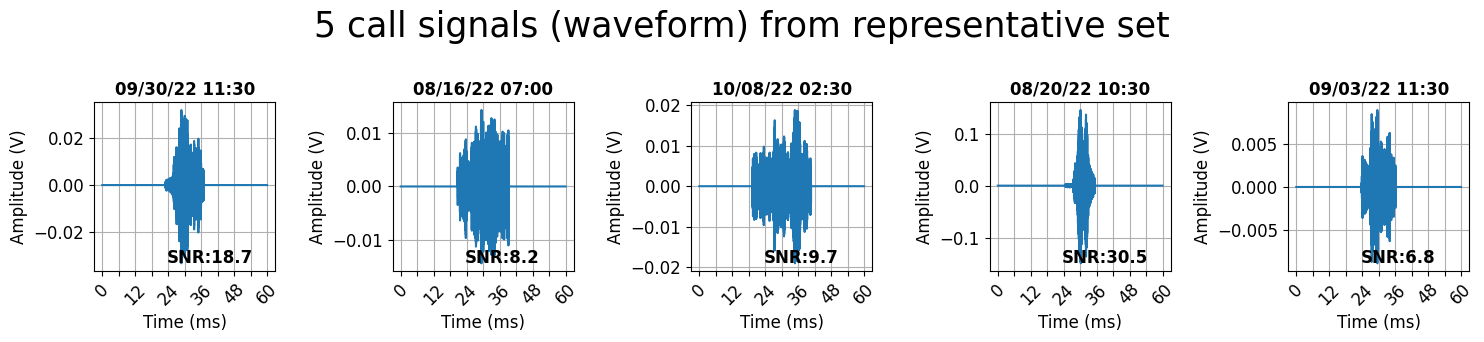

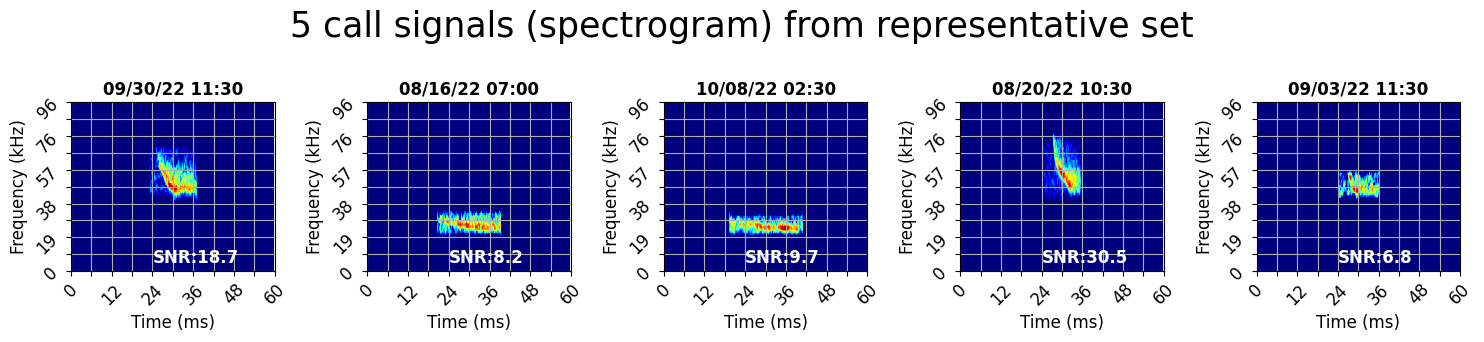

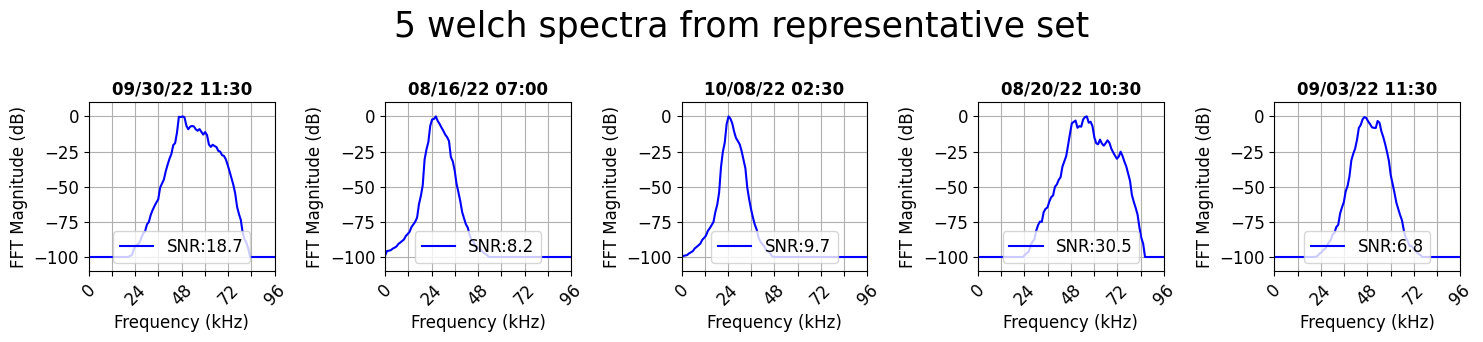

In [73]:
plot_n_calls(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_n_specs(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_n_welch(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)